In [4]:
# Project :: Stackoverflow survey analysis
# Author  :: Ramil Aleskerov       

import csv
from collections import Counter, OrderedDict

opSystems = Counter() # Operating Systems
total = 0             # Number of responses

with open('data/survey_results_public.csv') as f:
	csv_reader = csv.DictReader(f)

	for line in csv_reader:             # Reading response
		opSystems[line['OpSys']] += 1   # Updating operating system counter
		total += 1


In [53]:
## Printing out responses
opSystems_ordered = OrderedDict(sorted(opSystems.items(), key=lambda t: t[1], reverse=True))

for opSys, value in opSystems_ordered.items():
	print(f'{opSys}: {round(value/total,3) * 100}%')
    

Windows: 46.9%
MacOS: 26.5%
Linux-based: 25.3%
NA: 1.2%
BSD: 0.1%


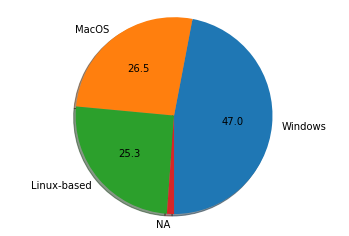

In [52]:
## Making the OpSys responses pretty
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

pdata = opSystems_ordered.pop('BSD')  # Preclean of data

# Pie chart
def my_autopct(pct): # Removes values for small %
    return ('%.1f' % pct) if pct > 5 else ''

fig1, ax1 = plt.subplots()
ax1.pie(opSystems_ordered.values(), labels=opSystems_ordered.keys(), autopct=my_autopct,
        shadow=True, startangle=-90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()